In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
from sklearn.model_selection import train_test_split
from torchvision import *
from torch.utils.data import *
from PIL import Image
import torch
import torch.nn as nn
from efficientnet_pytorch import EfficientNet
import matplotlib.pyplot as plt
import torchvision.transforms as T

In [ ]:
import os

source_dir = '/content/drive/MyDrive/Dataset'

class_folders = os.listdir(source_dir)

class_to_idx = {class_name: idx for idx, class_name in enumerate(class_folders)}



for class_name in class_folders:
    class_folder_path = os.path.join(source_dir, class_name)
    if os.path.isdir(class_folder_path):
        image_files = os.listdir(class_folder_path)
        print(f"Images in class {class_name} (Index {class_to_idx[class_name]}) ({len(image_files)} images):", image_files[:5])


Images in class Zapdos (Index 0) (52 images): ['7a63f55b762a4fe7b6cd92f17ea22ebf.jpg', '580e6e89333e494db94f2c251bd374ce.jpg', '672219c9fb3d42cab8558d5c3e140ddf.jpg', '570ae721c3554c64ae8c2ebcb58b7772.jpg', '7260b5b88cdd4e31b2c1521601d05307.jpg']
Images in class Weezing (Index 1) (50 images): ['7e41f42f7c2a4ec0b9104ec607fd82cd.jpg', '7d7babf2d3634afba867512e2b56d6ba.jpg', '58e0a7b110f340958a69ff964fc0930c.jpg', '62df9ac93f074efdb1b24e8a69a6bcc8.jpg', '57a3716272924643bd20449c9b636538.jpg']
Images in class Zubat (Index 2) (40 images): ['c0067eaa66604af2a1d92b182effdeab.jpg', '1ec8e81d53ef4a1ca0bffa047a054445.jpg', '2590cd66057e4e8e834fd08cc14609af.jpg', '2b19870678714102a93b335042961068.jpg', '10ad73300d104be29e778438a7784abf.jpg']
Images in class Wartortle (Index 3) (48 images): ['8d7f8c176a2a4d4ebd5d9cb8c25ba07a.jpg', '54c5b848d6a5412da32ca0431180428a.jpg', '53383a380117469aa358108341467e30.jpg', '41d7acdefe07432eb35bbc5632a9d8cb.jpg', '5c44e95c98b9425488553c8446249342.jpg']
Images in

In [ ]:
class_dirs = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]

all_images = []
for class_dir in class_dirs:
    class_path = os.path.join(source_dir, class_dir)
    images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith('.jpg')]
    labels = [class_dirs.index(class_dir)] * len(images)
    all_images.extend(list(zip(images, labels)))

train_images, temp_images = train_test_split(all_images, test_size=0.2, random_state=42)
val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

class CustomDataset(Dataset):
    def __init__(self, image_list, transform=None):
        self.image_list = image_list
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_path, label = self.image_list[idx]
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

train_dataset = CustomDataset(train_images, transform)
val_dataset = CustomDataset(val_images, transform)
test_dataset = CustomDataset(test_images, transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Données prêtes pour l'entraînement, validation et test.")


Données prêtes pour l'entraînement, validation et test.


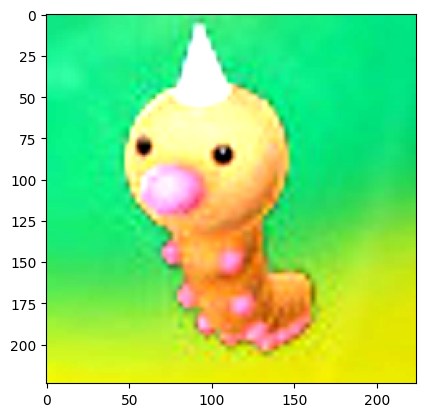

Label: 8


In [ ]:


def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(img.permute(1, 2, 0))
    plt.show()

data_iter = iter(train_loader)
images, labels = next(data_iter)
imshow(images[0])
print(f"Label: {labels[0]}")

In [ ]:
class_name = class_dirs[labels[0]]
print(f"Label (Nom de la classe): {class_name}")

Label (Nom de la classe): Weedle


In [ ]:
model = EfficientNet.from_pretrained('efficientnet-b0')

num_classes = len(class_dirs)
model._fc = nn.Linear(model._fc.in_features, num_classes)


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 134MB/s] 


Loaded pretrained weights for efficientnet-b0


In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
from tqdm import tqdm

Epoch 1/10: 100%|██████████| 167/167 [38:37<00:00, 13.88s/batch, accuracy=86.7, loss=0.549]


Epoch 1/10, Train Loss: 0.5487, Accuracy: 86.71%
Epoch 1/10, Validation Loss: 0.4950, Accuracy: 87.24%


Epoch 2/10: 100%|██████████| 167/167 [29:32<00:00, 10.61s/batch, accuracy=95.4, loss=0.18]


Epoch 2/10, Train Loss: 0.1801, Accuracy: 95.40%
Epoch 2/10, Validation Loss: 0.2840, Accuracy: 92.04%


Epoch 3/10: 100%|██████████| 167/167 [28:30<00:00, 10.24s/batch, accuracy=97.4, loss=0.101]


Epoch 3/10, Train Loss: 0.1010, Accuracy: 97.35%
Epoch 3/10, Validation Loss: 0.4439, Accuracy: 88.44%


Epoch 4/10: 100%|██████████| 167/167 [28:35<00:00, 10.27s/batch, accuracy=97.6, loss=0.0962]


Epoch 4/10, Train Loss: 0.0962, Accuracy: 97.62%
Epoch 4/10, Validation Loss: 0.4241, Accuracy: 91.14%


Epoch 5/10: 100%|██████████| 167/167 [29:07<00:00, 10.46s/batch, accuracy=98.2, loss=0.0706]


Epoch 5/10, Train Loss: 0.0706, Accuracy: 98.18%
Epoch 5/10, Validation Loss: 0.3366, Accuracy: 90.99%


Epoch 6/10: 100%|██████████| 167/167 [29:43<00:00, 10.68s/batch, accuracy=97.9, loss=0.0776]


Epoch 6/10, Train Loss: 0.0776, Accuracy: 97.90%
Epoch 6/10, Validation Loss: 0.4540, Accuracy: 90.24%


Epoch 7/10: 100%|██████████| 167/167 [30:16<00:00, 10.88s/batch, accuracy=97.1, loss=0.11]


Epoch 7/10, Train Loss: 0.1097, Accuracy: 97.05%
Epoch 7/10, Validation Loss: 0.6634, Accuracy: 83.78%


Epoch 8/10: 100%|██████████| 167/167 [30:23<00:00, 10.92s/batch, accuracy=96.6, loss=0.138]


Epoch 8/10, Train Loss: 0.1379, Accuracy: 96.62%
Epoch 8/10, Validation Loss: 0.5722, Accuracy: 86.79%


Epoch 9/10: 100%|██████████| 167/167 [29:07<00:00, 10.47s/batch, accuracy=97.4, loss=0.0938]


Epoch 9/10, Train Loss: 0.0938, Accuracy: 97.37%
Epoch 9/10, Validation Loss: 0.3463, Accuracy: 90.39%


Epoch 10/10: 100%|██████████| 167/167 [29:04<00:00, 10.44s/batch, accuracy=98, loss=0.0737]


Epoch 10/10, Train Loss: 0.0737, Accuracy: 97.97%
Epoch 10/10, Validation Loss: 0.6248, Accuracy: 84.53%


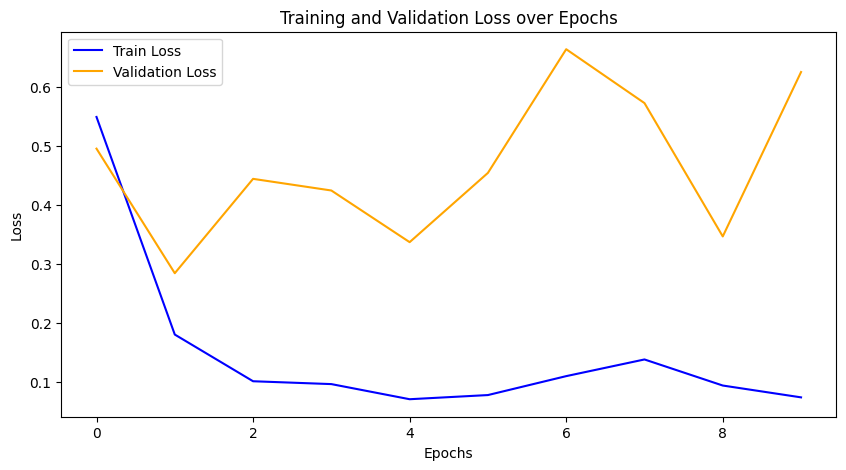

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

train_losses = []
val_losses = []

epochs = 10
for epoch in range(epochs):

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch") as pbar:
        for images, labels in pbar:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(images)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            pbar.set_postfix(loss=running_loss/len(train_loader), accuracy=100 * correct/total)

    train_losses.append(running_loss / len(train_loader))

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)

            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Train Loss', color='blue')
plt.plot(range(epochs), val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
model.eval()

test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_loader)

accuracy = 100 * correct / total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")


Test Loss: 0.5994, Test Accuracy: 85.74%
